# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receive responses from 62 undergraduates (stored in the Survey data set).

Loding Basic Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import iqr
import statsmodels.api as sm
from numpy.random import seed
import statistics 

In [2]:
s=pd.read_csv("Survey-1.csv")

# Exploratory Data Analysis:

In [3]:
s.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,1.0,Female,20.0,Junior,Other,Yes,2.9,Full-Time,50.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Male,23.0,Senior,Management,Yes,3.6,Part-Time,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Male,21.0,Junior,Other,Yes,2.5,Part-Time,45.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Male,21.0,Junior,CIS,Yes,2.5,Full-Time,40.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Male,23.0,Senior,Other,Undecided,2.8,Unemployed,40.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
s.dtypes

ID             float64
Gender          object
Age            float64
Class           object
Major           object
                ...   
Unnamed: 74    float64
Unnamed: 75    float64
Unnamed: 76    float64
Unnamed: 77    float64
Unnamed: 78    float64
Length: 79, dtype: object

In [5]:
row, col = s.shape
print("There are total {}".format(row),"rows and {}".format (col), "columns in the dataset" )

There are total 73 rows and 79 columns in the dataset


In [6]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     float64
 1   Gender             62 non-null     object 
 2   Age                62 non-null     float64
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     float64
 10  Satisfaction       62 non-null     float64
 11  Spending           62 non-null     float64
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        0 non-null      float64
 16  Unnamed: 16        3 non-nul

In [7]:
s.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this data, construct the following contingency tables (Keep Gender as row variable)

Gender and Major

Gender and Grad Intention

Gender and Employment

Gender and Computer


In [8]:
# 2.1.l Contingency Table showing relation between Gender and Major
s1=pd.crosstab(s['Gender'], s['Major'], margins=True)
s1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [9]:
# 2.1.2 Contingency Table showing relation between Gender and Grad Intention
s2=pd.crosstab(s['Gender'], s['Grad Intention'], margins=True)
s2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [10]:
# 2.1.3 Contingency Table showing relation between Gender and Employment
s3=pd.crosstab(s['Gender'], s['Employment'], margins=True)
s3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [11]:
# 2.1.4 Contingency Table showing relation between Gender and Computer
s4=pd.crosstab(s['Gender'], s['Computer'],margins=True)
s4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

1.What is the probability that a randomly selected CMSU student will be male?

2.What is the probability that a randomly selected CMSU student will be female?

In [12]:
# probability that a randomly selected CMSU student will be male
prob_male=29/62
print("prob that a randomly selected CMSU student will be male is: {}".format(prob_male))
#  probability that a randomly selected CMSU student will be female
prob_female=33/62
print("prob that a randomly selected CMSU student will be female is: {}".format(prob_female))


prob that a randomly selected CMSU student will be male is: 0.46774193548387094
prob that a randomly selected CMSU student will be female is: 0.532258064516129


Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

Find the conditional probability of different majors among the male students in CMSU.

Find the conditional probability of different majors among the male students in CMSU.

In [13]:
s1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [14]:
#Male
round(s1.loc["Male"]/s1.loc['Male']['All'],2)

Major
Accounting                0.14
CIS                       0.03
Economics/Finance         0.14
International Business    0.07
Management                0.21
Other                     0.14
Retailing/Marketing       0.17
Undecided                 0.10
All                       1.00
Name: Male, dtype: float64

In [15]:
#Female
round(s1.loc["Female"]/s1.loc['Female']['All'],2)

Major
Accounting                0.09
CIS                       0.09
Economics/Finance         0.21
International Business    0.12
Management                0.12
Other                     0.09
Retailing/Marketing       0.27
Undecided                 0.00
All                       1.00
Name: Female, dtype: float64

Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

Find the probability That a randomly chosen student is a male and intends to graduate.

Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [16]:
s2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [17]:
# Find the probability That a randomly chosen student is a male and intends to graduate.
round(s2.loc["Male"]['Yes']/s2.loc['All']['All'],3)

0.274

In [18]:
s4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

Find the probability that a randomly chosen student is either a male or has a full-time employment?

Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [19]:
round((s4.loc['Female']['Desktop']+s4.loc['Female']['Tablet'])/s4.loc['All']['All'],2)

0.06

In [20]:
s3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


P(M U E) = P(M)+ P(E) - P(M ∩ E)

In [21]:
round((s3.loc['Male']['All']+s3.loc['All']['Full-Time']-s3.loc['Male']['Full-Time'])/s3.loc['All']['All'],3)

0.516

In [22]:
## Find the conditional probability that given a female student is randomly chosen,
## she is majoring in international business or management.
s1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [23]:
round((s1.loc['Female']['International Business']+s1.loc['Female']['Management'])/s3.loc['Female']['All'],3)

0.242

Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [24]:
d=pd.crosstab(s['Gender'],s['Grad Intention'])
d.drop('Undecided', axis=1, inplace=True)
# Dropping Undecided column so that We have Intent to graduate  as Yes and No
d['Total'] = d.sum(axis=1) # Adding column total
d

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20


P(F∩Yes)

In [25]:
d.loc['Female']['Yes']/d['Total'].sum()


0.275

P(F)P(Yes)

In [26]:
(d.loc['Female']['Total']/d['Total'].sum())  * (d['Yes'].sum()/d['Total'].sum())

0.35

Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [27]:
s.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,1.0,Female,20.0,Junior,Other,Yes,2.9,Full-Time,50.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Male,23.0,Senior,Management,Yes,3.6,Part-Time,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Male,21.0,Junior,Other,Yes,2.5,Part-Time,45.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Male,21.0,Junior,CIS,Yes,2.5,Full-Time,40.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Male,23.0,Senior,Other,Undecided,2.8,Unemployed,40.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prob(GPA<3)


In [28]:
#round(s['s'['GPA']<3].groupby(['Gender']).count()['GPA'].sum()/s.Gender.coumt(),3)
#round(s['s'['GPA']<3].groupby(['Gender']).count()['GPA'].sum()/data.Gender.count(),3)

In [29]:
round((s[s['Salary']>=50].groupby(['Gender']).count()['Salary'])/s.groupby('Gender').size(),3)

Gender
Female    0.545
Male      0.483
dtype: float64

Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


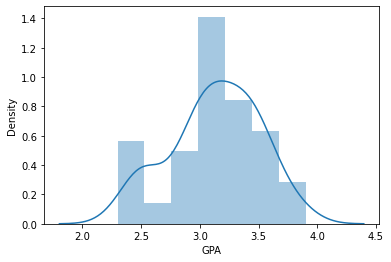

In [30]:
 ## Distrbution of GPA 
sns.distplot(s['GPA'])
plt.show()

C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


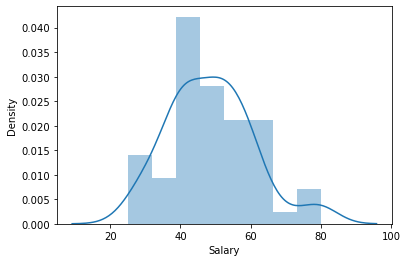

In [31]:
# Distrbution of Salary 
sns.distplot(s['Salary'])
plt.show()

C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


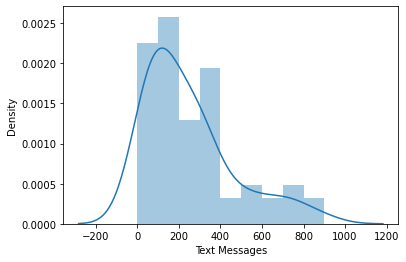

In [32]:
#Distribution of Text Message 
sns.distplot(s['Text Messages'])
plt.show()

C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


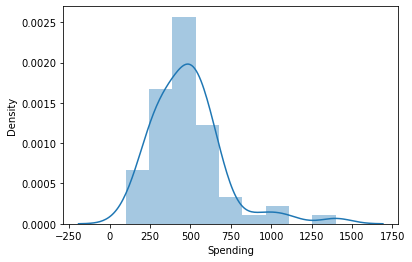

In [33]:
##Distribution of Spending 
sns.distplot(s['Spending'])
plt.show()

In [34]:
df=s[['Salary','Spending','Text Messages']]

In [35]:
df.mean()

Salary            48.548387
Spending         482.016129
Text Messages    246.209677
dtype: float64

In [36]:
df.std()

Salary            12.080912
Spending         221.953805
Text Messages    214.465950
dtype: float64